# Laboratoire 3 : Machines à vecteur de support et réseaux neuronaux
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | Alexandre Bleau — BLEA14058906 / David Létinaud  — LETD05129708 / Thomas Lioret   — LIOT20069605|
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2019                                            |
| Groupe                | 1                                                       |
| Numéro du laboratoire | 3                                                       |
| Professeur            | Prof. LOMBAERT                                          |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 18/11/2019                                              |

## Introduction

Au cours de ce troisième laboratoire nous allons étudier deux nouveaux algorithme de classification pour résoudre le problème de classification des galaxies : les réseaux neuronaux et les machines à vecteurs de support (SVM). 
Dans un premier temps, nous allons concevoir un modèle de réseaux neuronaux basé sur le Multi-Layer Perceptron. Nous entrainerons ce modèle afin qu'il puisse classer les galaxies en "smooth" ou "spiral" en utilisant l'ensemble des primitives. Nous utiliserons le module keras de Google tensorflow
Le deuxième modèle d'apprentissage s'appuie sur un modèle d'optimisation convexe dans le cas du SVM. Dans ce cas, nous n'utiliserons qu'une partie des primitives proposées et seront couplées à nos primitives développées lors du premier laboratoire.
Nous étudierons également l'influence des hyperparamètres de ces deux méthodes afin de proposer le modèle le plus optimal dans le cas de notre problème de classification de galaxies.

## Question 1
(grille de correction : Les approches de validations sont présentées et utilisées correctement.)

Dans le cas des réseaux neuronaux, l'utilisation d'une méthode de validation croisée prendrait beaucoup de temps. En effet, il faudrait répéter plusieurs tests avec un nombre "d'epochs" conséquent : ceci serait très chronophage. Nous avons donc décider d'utiliser la méthode de validation hold-out avec 70% de donées d'entrainement et 30% de test.

Concernant la méthode SVM, nous utilisons la méthode ......... (k-fold????)


## Question 2
(La méthode de normalisation des données est décrite et correcte.)

Nous normalisons nos données grâce à la méthode "normalize" de la librairie preprocessing. La normalisation se fait par rapport à la valeur maximale. Nous avons décider de normaliser par rapport aux primitives (axis = 0). Par ailleurs, nous avons remarqué avec nos premier tests que les performances étaient meilleures si l'on normalisait par rapport à la valeur maximale (norm = 'max').

## Question 3
(Le modèle MLP est décrit (structure, nombre de couches). La fonction de coût choisie est mentionnée ainsi que les raisons pour lesquelles elle a été choisie.)

La principale contrainte du modèle MLP est de trouver un compromis entre le temps d'apprentissage et l'accuracy. La première architecture proposée par l'énoncé est de trois couches : 100, 100, 2 (nombre de perceptrons). Nous avons étudié différents cas avec 60 epochs :  
1 - l'influence du nombre de perceptrons avec un nombre de couche fixé.  
2 - l'influence du nombre de couches avec le même nombre de perceptrons par couche.


In [1]:
# Initialisation
from RN_model import *
from functions import get_data , plot_perf, plot_delay
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard # Pour affichage sur tensorboard
import shutil

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Import and normalize data
X_train, X_test, Y_train, Y_test = get_data()

In [3]:
# Initialisations
layer_sizes = [100, 100, 2]
epochs = 60
learning_rate = 0.0005
batch_size = 100

dropout = 0.5

# Pour affichage
sub_title = ['loss','acc','f1','val_loss','val_acc', 'val_f1']
x_lab = "epochs"

Voici donc nos résultats avec différentes structures de réseaux de neurones :

1 - a:

In [4]:
training_delay_RN = []
predicting_delay_RN = []
history_obj = []

best_accuracy_RN = 0

nb_perceptrons_range = [[5, 4, 4],[100, 100, 2],[500, 500, 500]]                                                                                                                      

# Suppression de la dernière étude d'hyperparamètre
try:
    shutil.rmtree('./logs')
except:
    print("nothing to delete")
    
# Callbacks pour affichage des performances dans tensorflow : 1 callback pour chaque hyperparamètre
tensorboard_callback = []
for i in range(3):
    tensorboard_callback.append(TensorBoard(log_dir="logs\{}".format(i)))
# Par invité de commande : 
# tensorboard --logdir="./logs" --port 6006
cpt = 0
for nb_perceptrons in nb_perceptrons_range:                                                                                                                                                  
    model = RN_model(nb_perceptrons, dropout, learning_rate)                                                                                                                              
    #### Apprentissage                                                                                                                                                             
    start = time.time()                                                                                                                                                            
    hist_obj = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, Y_test), callbacks = [tensorboard_callback[cpt]])                                                             

    end = time.time()                                                                                                                                                              
    training_delay_RN.append(end - start)                                                                                                                                          

    history_obj.append( list(hist_obj.history.values()))

    #### Prédiction                                                                                                                                                                
    start = time.time()                                                                                                                                                            

    Y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)                                                                                                                           

    end = time.time()                                                                                                                                                              
    predicting_delay_RN.append(end - start)    
    cpt+=1   

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 12800 samples, validate on 3200 samples
Epoch 1/60
12800/12800 [==============================] - 2s 170us/sample - loss: 0.6892 - acc: 0.5052 - f1: 0.6600 - val_loss: 0.6841 - val_acc: 0.5191 - val_f1: 0.6824
Epoch 2/60
12800/12800 [==============================] - 1s 58us/sample - loss: 0.6820 - acc: 0.4955 - f1: 0.6566 - val_loss: 0.6631 - val_acc: 0.5191 - val_f1: 0.6819
Epoch 3/60
12800/12800 [==============================] - 1s 63us/sample - loss: 0.6700 - acc: 0.4901 - f1: 0.6537 - val_loss: 0.6319 - val_acc: 0.5191 - val_f1: 0.6824
Epoch 4/60
12800/12800 [==============================] - 1s 61us/sample - loss: 0.6604 - acc: 0.5371 - f1: 0.5291 - val_loss: 0.6136 - val_acc: 0.8381 - val_f1: 0.8536
Epoch 5/60
12800/12800 [==============================] - 1s 62us/sample - loss: 0.6416 - acc: 0.5985 - f1: 0.4229 - val_loss: 0.5807 - val_acc: 0.8597 - val_f1: 0.8744
Epoch 6/60
12800/12800 [

12800/12800 [==============================] - 1s 83us/sample - loss: 0.4070 - acc: 0.7402 - f1: 0.7949 - val_loss: 0.1665 - val_acc: 0.9572 - val_f1: 0.9589
Epoch 35/60
12800/12800 [==============================] - 1s 82us/sample - loss: 0.4124 - acc: 0.7341 - f1: 0.7912 - val_loss: 0.1579 - val_acc: 0.9572 - val_f1: 0.9588
Epoch 36/60
12800/12800 [==============================] - 1s 84us/sample - loss: 0.4108 - acc: 0.7348 - f1: 0.7920 - val_loss: 0.1546 - val_acc: 0.9578 - val_f1: 0.9589
Epoch 37/60
12800/12800 [==============================] - 1s 84us/sample - loss: 0.4104 - acc: 0.7353 - f1: 0.7922 - val_loss: 0.1547 - val_acc: 0.9581 - val_f1: 0.9602
Epoch 38/60
12800/12800 [==============================] - 1s 79us/sample - loss: 0.4086 - acc: 0.7337 - f1: 0.7916 - val_loss: 0.1587 - val_acc: 0.9584 - val_f1: 0.9605
Epoch 39/60
12800/12800 [==============================] - 1s 79us/sample - loss: 0.4155 - acc: 0.7326 - f1: 0.7901 - val_loss: 0.1676 - val_acc: 0.9572 - val_f1:

Epoch 22/60
12800/12800 [==============================] - 3s 209us/sample - loss: 0.1081 - acc: 0.9608 - f1: 0.9621 - val_loss: 0.1016 - val_acc: 0.9613 - val_f1: 0.9620
Epoch 23/60
12800/12800 [==============================] - 3s 244us/sample - loss: 0.1019 - acc: 0.9623 - f1: 0.9632 - val_loss: 0.1125 - val_acc: 0.9600 - val_f1: 0.9619
Epoch 24/60
12800/12800 [==============================] - 3s 232us/sample - loss: 0.1040 - acc: 0.9623 - f1: 0.9634 - val_loss: 0.1202 - val_acc: 0.9556 - val_f1: 0.9568
Epoch 25/60
12800/12800 [==============================] - 3s 218us/sample - loss: 0.1065 - acc: 0.9620 - f1: 0.9633 - val_loss: 0.1056 - val_acc: 0.9603 - val_f1: 0.9620
Epoch 26/60
12800/12800 [==============================] - 3s 237us/sample - loss: 0.1089 - acc: 0.9580 - f1: 0.9591 - val_loss: 0.1193 - val_acc: 0.9556 - val_f1: 0.9585
Epoch 27/60
12800/12800 [==============================] - 3s 223us/sample - loss: 0.1124 - acc: 0.9592 - f1: 0.9605 - val_loss: 0.1042 - val_acc

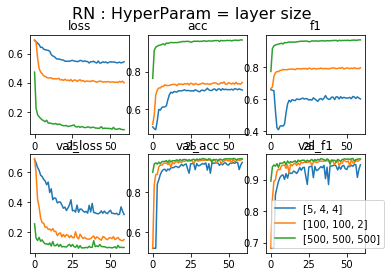

In [8]:
# Mise en forme des données pour l'affichage final
ho = np.array(history_obj)
ho = ho.transpose(1,2,0)

leg = [str(i) for i in nb_perceptrons_range]  

titre = "RN : HyperParam = layer size"                                                                                                                                          

plot_perf(ho, leg, titre ,sub_title)

Nous remarquons qu'avec trois couches, les performances d'accuracy et de f1_score sont meilleurs dans le cas de [500,500,500] (dépassant les 95%). On remarque également que la perte ("loss") est, en quelque sorte, inversement proportionnelle aux f1_score et accuracy dans ce cas. C'est à dire que pour un f1_score et une accuracy plus faible (nombre de perceptrons inférieur) la valeur de perte sera plus importante que les architectures avec plus de perceptrons.


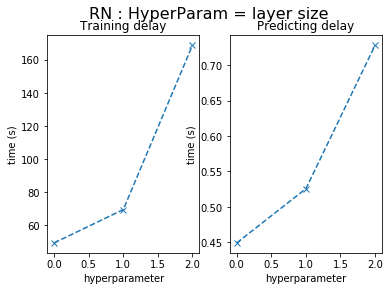

In [9]:
plot_delay(training_delay_RN,predicting_delay_RN,titre)


En revanche, ajouter un nombre de perceptrons par couche important influence grandement le temps d'entrainement et de prediction.


1 - b:

In [12]:
training_delay_RN = []
predicting_delay_RN = []
history_obj = []
cpt = 0
best_accuracy_RN = 0

layer_sizes_range = [[100],[100, 100, 2],[100, 100, 100, 100, 100, 2]]

# Suppression de la dernière étude d'hyperparamètre
try:
    shutil.rmtree('./logs')
except:
    print("nothing to delete")

# Callbacks pour affichage des performances dans tensorflow : 1 callback pour chaque hyperparamètre
tensorboard_callback = []
for i in range(3):
    tensorboard_callback.append(TensorBoard(log_dir="logs\{}".format(i)))
# Par invité de commande : 
# tensorboard --logdir="./logs" --port 6006
cpt = 0
for layer_s in layer_sizes_range:
    model = RN_model(layer_s, dropout, learning_rate)
    #### Apprentissage                                                                                                                                                               
    start = time.time()                                                                                                                   
    hist_obj = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, Y_test), callbacks = [tensorboard_callback[cpt]]) 

    end = time.time()
    training_delay_RN.append(end - start)

    history_obj.append( list(hist_obj.history.values()))

    #### Prédiction                                                                                                                                                                  
    start = time.time()

    Y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)

    end = time.time()
    predicting_delay_RN.append(end - start)
    cpt+=1

nothing to delete
Train on 12800 samples, validate on 3200 samples
Epoch 1/60
12800/12800 [==============================] - 2s 157us/sample - loss: 0.6050 - acc: 0.7092 - f1: 0.7182 - val_loss: 0.4803 - val_acc: 0.8347 - val_f1: 0.8448
Epoch 2/60
12800/12800 [==============================] - 1s 66us/sample - loss: 0.4064 - acc: 0.8424 - f1: 0.8468 - val_loss: 0.3396 - val_acc: 0.8612 - val_f1: 0.8596
Epoch 3/60
12800/12800 [==============================] - 1s 65us/sample - loss: 0.3104 - acc: 0.8813 - f1: 0.8843 - val_loss: 0.2631 - val_acc: 0.8978 - val_f1: 0.9008
Epoch 4/60
12800/12800 [==============================] - 1s 66us/sample - loss: 0.2537 - acc: 0.9072 - f1: 0.9098 - val_loss: 0.2245 - val_acc: 0.9125 - val_f1: 0.9123
Epoch 5/60
12800/12800 [==============================] - 1s 61us/sample - loss: 0.2214 - acc: 0.9203 - f1: 0.9226 - val_loss: 0.1979 - val_acc: 0.9250 - val_f1: 0.9293
Epoch 6/60
12800/12800 [==============================] - 1s 62us/sample - loss: 0.1961

Epoch 49/60
12800/12800 [==============================] - 1s 63us/sample - loss: 0.1106 - acc: 0.9593 - f1: 0.9602 - val_loss: 0.1092 - val_acc: 0.9566 - val_f1: 0.9580
Epoch 50/60
12800/12800 [==============================] - 1s 64us/sample - loss: 0.1095 - acc: 0.9604 - f1: 0.9618 - val_loss: 0.1045 - val_acc: 0.9606 - val_f1: 0.9617
Epoch 51/60
12800/12800 [==============================] - 1s 60us/sample - loss: 0.1090 - acc: 0.9595 - f1: 0.9605 - val_loss: 0.1072 - val_acc: 0.9569 - val_f1: 0.9579
Epoch 52/60
12800/12800 [==============================] - 1s 65us/sample - loss: 0.1082 - acc: 0.9606 - f1: 0.9619 - val_loss: 0.1025 - val_acc: 0.9622 - val_f1: 0.9634
Epoch 53/60
12800/12800 [==============================] - 1s 62us/sample - loss: 0.1101 - acc: 0.9598 - f1: 0.9613 - val_loss: 0.1061 - val_acc: 0.9581 - val_f1: 0.9584
Epoch 54/60
12800/12800 [==============================] - 1s 62us/sample - loss: 0.1097 - acc: 0.9590 - f1: 0.9605 - val_loss: 0.1170 - val_acc: 0.95

Epoch 37/60
12800/12800 [==============================] - 1s 86us/sample - loss: 0.4106 - acc: 0.7365 - f1: 0.7927 - val_loss: 0.1517 - val_acc: 0.9428 - val_f1: 0.9468
Epoch 38/60
12800/12800 [==============================] - 1s 88us/sample - loss: 0.4075 - acc: 0.7403 - f1: 0.7958 - val_loss: 0.1710 - val_acc: 0.9475 - val_f1: 0.9469
Epoch 39/60
12800/12800 [==============================] - 1s 88us/sample - loss: 0.4067 - acc: 0.7399 - f1: 0.7950 - val_loss: 0.1480 - val_acc: 0.9578 - val_f1: 0.9588
Epoch 40/60
12800/12800 [==============================] - 1s 92us/sample - loss: 0.4134 - acc: 0.7375 - f1: 0.7931 - val_loss: 0.1660 - val_acc: 0.9559 - val_f1: 0.9582
Epoch 41/60
12800/12800 [==============================] - 1s 89us/sample - loss: 0.4109 - acc: 0.7331 - f1: 0.7899 - val_loss: 0.1539 - val_acc: 0.9531 - val_f1: 0.9551
Epoch 42/60
12800/12800 [==============================] - 1s 86us/sample - loss: 0.4102 - acc: 0.7349 - f1: 0.7909 - val_loss: 0.1681 - val_acc: 0.95

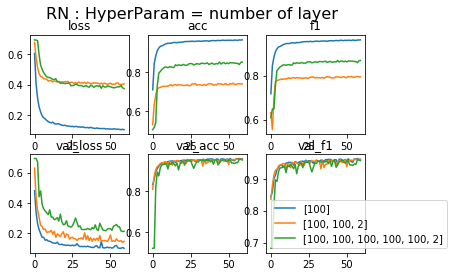

In [13]:
# Mise en forme des données pour l'affichage
ho = np.array(history_obj)
ho = ho.transpose(1,2,0)

leg = [str(i) for i in layer_sizes_range]                                                                                                                                              

titre = "RN : HyperParam = number of layer"                                                                                                                                         

plot_perf(ho, leg, titre ,sub_title)

Dans notre problème de classification de galaxies, on note que le les valeurs des accuracy et des f1_scores tendent vers les mêmes performances sur les jeux de données de tests qu'il y ait une, trois ou six couches (nb de perceptrons constant par couche). On remarque également que la valeur de perte est moins importante dans le cas où il y le moins de couche. 


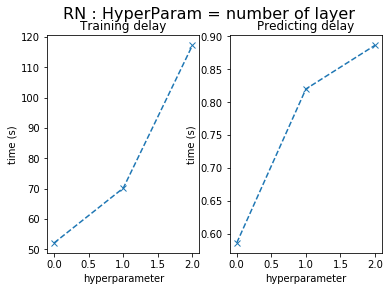

In [14]:
plot_delay(training_delay_RN,predicting_delay_RN,titre)

Ici, nous remarquons que : plus le nombre de couche est important plus le temps d'entrainement et de prediction sont élevés.


In [23]:
################################## Learning rate                                                                                                                                     
training_delay_RN = []
predicting_delay_RN = []
history_obj = []
cpt = 0
best_accuracy_RN = 0

l_rate_range = [0.00001,0.0005,0.01]

# Suppression de la dernière étude d'hyperparamètre
try:
    shutil.rmtree('./logs')
except:
    print("nothing to delete")

# Callbacks pour affichage des performances dans tensorflow : 1 callback pour chaque hyperparamètre
tensorboard_callback = []
for i in range(3):
    tensorboard_callback.append(TensorBoard(log_dir="logs\{}".format(i)))#time.time())))
# Par invité de commande : 
# tensorboard --logdir="./logs" --port 6006
cpt = 0
for l_rate in l_rate_range:
    model = RN_model(layer_sizes, dropout, l_rate)
    #### Apprentissage
    start = time.time()
    #model.fit(X_train, Y_train, batch_size = 100, epochs = 60)
    hist_obj = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, validation_data=(X_test, Y_test), callbacks = [tensorboard_callback[cpt]])
    end = time.time()
    training_delay_RN.append(end - start)

    history_obj.append( list(hist_obj.history.values()))

    #### Prédiction
    start = time.time()

    Y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)

    end = time.time()
    predicting_delay_RN.append(end - start)
    cpt+=1

Train on 12800 samples, validate on 3200 samples
Epoch 1/60
12800/12800 [==============================] - 4s 335us/sample - loss: 0.7037 - acc: 0.5000 - f1: 0.5105 - val_loss: 0.6919 - val_acc: 0.4897 - val_f1: 0.0445
Epoch 2/60
12800/12800 [==============================] - 2s 119us/sample - loss: 0.6987 - acc: 0.5121 - f1: 0.5400 - val_loss: 0.6930 - val_acc: 0.4934 - val_f1: 0.0598
Epoch 3/60
12800/12800 [==============================] - 2s 119us/sample - loss: 0.6947 - acc: 0.5100 - f1: 0.5464 - val_loss: 0.6930 - val_acc: 0.4991 - val_f1: 0.0891
Epoch 4/60
12800/12800 [==============================] - 2s 120us/sample - loss: 0.6940 - acc: 0.5145 - f1: 0.5556 - val_loss: 0.6929 - val_acc: 0.5169 - val_f1: 0.1631
Epoch 5/60
12800/12800 [==============================] - 2s 125us/sample - loss: 0.6941 - acc: 0.5105 - f1: 0.5580 - val_loss: 0.6928 - val_acc: 0.5344 - val_f1: 0.2595
Epoch 6/60
12800/12800 [==============================] - 2s 124us/sample - loss: 0.6935 - acc: 0.514

Epoch 49/60
12800/12800 [==============================] - 2s 127us/sample - loss: 0.6379 - acc: 0.6808 - f1: 0.7158 - val_loss: 0.6059 - val_acc: 0.8213 - val_f1: 0.8125
Epoch 50/60
12800/12800 [==============================] - 2s 128us/sample - loss: 0.6341 - acc: 0.6868 - f1: 0.7171 - val_loss: 0.6040 - val_acc: 0.8241 - val_f1: 0.8162
Epoch 51/60
12800/12800 [==============================] - 2s 125us/sample - loss: 0.6369 - acc: 0.6833 - f1: 0.7191 - val_loss: 0.6028 - val_acc: 0.8269 - val_f1: 0.8202
Epoch 52/60
12800/12800 [==============================] - 2s 132us/sample - loss: 0.6330 - acc: 0.6840 - f1: 0.7185 - val_loss: 0.6004 - val_acc: 0.8278 - val_f1: 0.8211
Epoch 53/60
12800/12800 [==============================] - 2s 129us/sample - loss: 0.6308 - acc: 0.6946 - f1: 0.7259 - val_loss: 0.5972 - val_acc: 0.8284 - val_f1: 0.8209
Epoch 54/60
12800/12800 [==============================] - 2s 127us/sample - loss: 0.6299 - acc: 0.6881 - f1: 0.7217 - val_loss: 0.5949 - val_acc

Epoch 24/60
12800/12800 [==============================] - 2s 127us/sample - loss: 0.6926 - acc: 0.5192 - f1: 0.6824 - val_loss: 0.6925 - val_acc: 0.5191 - val_f1: 0.6820
Epoch 25/60
12800/12800 [==============================] - 2s 131us/sample - loss: 0.6926 - acc: 0.5192 - f1: 0.6822 - val_loss: 0.6924 - val_acc: 0.5191 - val_f1: 0.6820
Epoch 26/60
12800/12800 [==============================] - 2s 130us/sample - loss: 0.6925 - acc: 0.5192 - f1: 0.6822 - val_loss: 0.6924 - val_acc: 0.5191 - val_f1: 0.6821
Epoch 27/60
12800/12800 [==============================] - 2s 134us/sample - loss: 0.6925 - acc: 0.5192 - f1: 0.6820 - val_loss: 0.6924 - val_acc: 0.5191 - val_f1: 0.6824
Epoch 28/60
12800/12800 [==============================] - 2s 127us/sample - loss: 0.6926 - acc: 0.5192 - f1: 0.6825 - val_loss: 0.6924 - val_acc: 0.5191 - val_f1: 0.6824
Epoch 29/60
12800/12800 [==============================] - 1s 116us/sample - loss: 0.6924 - acc: 0.5163 - f1: 0.6082 - val_loss: 0.6933 - val_acc

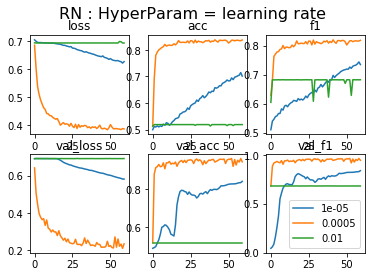

In [24]:
# Traitement pour affichage
ho = np.array(history_obj)
ho = ho.transpose(1,2,0)
                                                                                                                                      
leg = [str(i) for i in l_rate_range]                                                                                                                                                
                                                                                                                                    
titre = "RN : HyperParam = learning rate"                                                                                                                                           

plot_perf(ho, leg, titre ,sub_title)

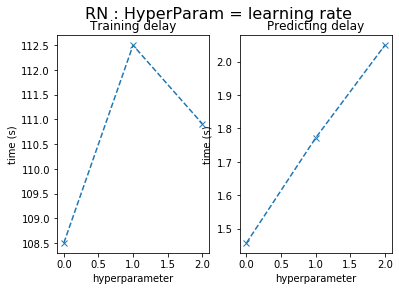

In [25]:
plot_delay(training_delay_RN,predicting_delay_RN,titre)

La fonction de coût que nous avons choisie est "Binary Cross-Entropy Loss". En effet, nous avons choisi cette fonction car nos valeurs cibles sont 0 ou 1, soit "smooth" ou "spiral".

## Question 4
(L’analyse est claire et l’équipe démontre une compréhension du phénomène de sur-apprentissage. Il le phénomène est correctement décrit et montré dans le graphique dans la mesure du possible.)


In [15]:
training_delay_RN = []
predicting_delay_RN = []
history_obj = []
cpt = 0
best_accuracy_RN = 0

epochs_range = [30,60, 5000]                                                                                                                                            
max_ep = max(epochs_range) 

# Suppression de la dernière étude d'hyperparamètre
try:
    shutil.rmtree('./logs')
except:
    print("nothing to delete")
    
# Callbacks pour affichage des performances dans tensorflow : 1 callback pour chaque hyperparamètre
tensorboard_callback = []
for i in range(3):
    tensorboard_callback.append(TensorBoard(log_dir="logs\{}".format(i)))
# Par invité de commande : 
# tensorboard --logdir="./logs" --port 6006
cpt = 0
for ep in epochs_range:                                                                                                                                                            
    model = RN_model(layer_sizes, dropout, learning_rate)                                                                                                                          
    #### Apprentissage                                                                                                                                                             
    start = time.time()                                                                                                                                                            
    #model.fit(X_train, Y_train, batch_size = 100, epochs = 60)                                                                                                                    
    hist_obj = model.fit(X_train, Y_train, batch_size = batch_size, epochs = ep, validation_data=(X_test, Y_test), callbacks = [tensorboard_callback[cpt]])                                                                  

    end = time.time()                                                                                                                                                              
    training_delay_RN.append(end - start)                                                                                                                                          

    ho_tmp = list(hist_obj.history.values())                                                                                                                                       
    ho_tmp = [i + [np.nan for _ in range(max_ep-ep)] for i in ho_tmp ]                                                                                                             
    history_obj.append(ho_tmp)
    #### Prédiction                                                                                                                                                                
    start = time.time()                                                                                                                                                            

    Y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)                                                                                                                           

    end = time.time()                                                                                                                                                              
    predicting_delay_RN.append(end - start) 
    cpt+=1

Train on 12800 samples, validate on 3200 samples
Epoch 1/30
12800/12800 [==============================] - 3s 257us/sample - loss: 0.6910 - acc: 0.5345 - f1: 0.6510 - val_loss: 0.6874 - val_acc: 0.6463 - val_f1: 0.7397
Epoch 2/30
12800/12800 [==============================] - 1s 82us/sample - loss: 0.6250 - acc: 0.6930 - f1: 0.7213 - val_loss: 0.5229 - val_acc: 0.8491 - val_f1: 0.8481
Epoch 3/30
12800/12800 [==============================] - 1s 96us/sample - loss: 0.5583 - acc: 0.7711 - f1: 0.7996 - val_loss: 0.4561 - val_acc: 0.8941 - val_f1: 0.8980
Epoch 4/30
12800/12800 [==============================] - 1s 97us/sample - loss: 0.5209 - acc: 0.7946 - f1: 0.8219 - val_loss: 0.4185 - val_acc: 0.9078 - val_f1: 0.9124
Epoch 5/30
12800/12800 [==============================] - 1s 86us/sample - loss: 0.4992 - acc: 0.8013 - f1: 0.8301 - val_loss: 0.4133 - val_acc: 0.9106 - val_f1: 0.9174
Epoch 6/30
12800/12800 [==============================] - 1s 102us/sample - loss: 0.4836 - acc: 0.8081 - 

Epoch 6/4000
12800/12800 [==============================] - 1s 93us/sample - loss: 0.4723 - acc: 0.8060 - f1: 0.7830 - val_loss: 0.3622 - val_acc: 0.9344 - val_f1: 0.9372
Epoch 7/4000
12800/12800 [==============================] - 1s 93us/sample - loss: 0.4729 - acc: 0.8011 - f1: 0.7756 - val_loss: 0.3696 - val_acc: 0.9234 - val_f1: 0.9222
Epoch 8/4000
12800/12800 [==============================] - 1s 92us/sample - loss: 0.4587 - acc: 0.8081 - f1: 0.7822 - val_loss: 0.3411 - val_acc: 0.9322 - val_f1: 0.9359
Epoch 9/4000
12800/12800 [==============================] - 1s 93us/sample - loss: 0.4447 - acc: 0.8173 - f1: 0.7950 - val_loss: 0.3496 - val_acc: 0.9228 - val_f1: 0.9203
Epoch 10/4000
12800/12800 [==============================] - 1s 92us/sample - loss: 0.4425 - acc: 0.8145 - f1: 0.7912 - val_loss: 0.3166 - val_acc: 0.9438 - val_f1: 0.9447
Epoch 11/4000
12800/12800 [==============================] - 1s 92us/sample - loss: 0.4342 - acc: 0.8212 - f1: 0.7987 - val_loss: 0.3065 - val_a

Epoch 54/4000
12800/12800 [==============================] - 1s 92us/sample - loss: 0.3906 - acc: 0.8321 - f1: 0.8112 - val_loss: 0.2153 - val_acc: 0.9578 - val_f1: 0.9590
Epoch 55/4000
12800/12800 [==============================] - 1s 101us/sample - loss: 0.3851 - acc: 0.8360 - f1: 0.8167 - val_loss: 0.2171 - val_acc: 0.9559 - val_f1: 0.9565
Epoch 56/4000
12800/12800 [==============================] - 1s 91us/sample - loss: 0.3917 - acc: 0.8353 - f1: 0.8148 - val_loss: 0.2196 - val_acc: 0.9594 - val_f1: 0.9601
Epoch 57/4000
12800/12800 [==============================] - 1s 93us/sample - loss: 0.3819 - acc: 0.8378 - f1: 0.8183 - val_loss: 0.2274 - val_acc: 0.9488 - val_f1: 0.9485
Epoch 58/4000
12800/12800 [==============================] - 1s 95us/sample - loss: 0.3897 - acc: 0.8321 - f1: 0.8115 - val_loss: 0.2148 - val_acc: 0.9566 - val_f1: 0.9577
Epoch 59/4000
12800/12800 [==============================] - 1s 97us/sample - loss: 0.3817 - acc: 0.8362 - f1: 0.8153 - val_loss: 0.2181 - 

12800/12800 [==============================] - 1s 92us/sample - loss: 0.3692 - acc: 0.8438 - f1: 0.8253 - val_loss: 0.2032 - val_acc: 0.9644 - val_f1: 0.9651
Epoch 149/4000
12800/12800 [==============================] - 1s 93us/sample - loss: 0.3679 - acc: 0.8430 - f1: 0.8244 - val_loss: 0.2045 - val_acc: 0.9609 - val_f1: 0.9616
Epoch 150/4000
12800/12800 [==============================] - 1s 93us/sample - loss: 0.3639 - acc: 0.8473 - f1: 0.8300 - val_loss: 0.1989 - val_acc: 0.9647 - val_f1: 0.9662
Epoch 151/4000
12800/12800 [==============================] - 1s 104us/sample - loss: 0.3691 - acc: 0.8442 - f1: 0.8261 - val_loss: 0.2035 - val_acc: 0.9622 - val_f1: 0.9630
Epoch 152/4000
12800/12800 [==============================] - 1s 92us/sample - loss: 0.3694 - acc: 0.8419 - f1: 0.8223 - val_loss: 0.2031 - val_acc: 0.9622 - val_f1: 0.9631
Epoch 153/4000
12800/12800 [==============================] - 1s 93us/sample - loss: 0.3724 - acc: 0.8410 - f1: 0.8216 - val_loss: 0.2233 - val_acc: 

12800/12800 [==============================] - 1s 69us/sample - loss: 0.3590 - acc: 0.8509 - f1: 0.8340 - val_loss: 0.2098 - val_acc: 0.9581 - val_f1: 0.9587
Epoch 243/4000
12800/12800 [==============================] - 1s 76us/sample - loss: 0.3599 - acc: 0.8478 - f1: 0.8292 - val_loss: 0.2174 - val_acc: 0.9556 - val_f1: 0.9557
Epoch 244/4000
12800/12800 [==============================] - 1s 90us/sample - loss: 0.3586 - acc: 0.8501 - f1: 0.8330 - val_loss: 0.2070 - val_acc: 0.9619 - val_f1: 0.9613
Epoch 245/4000
12800/12800 [==============================] - 1s 100us/sample - loss: 0.3688 - acc: 0.8412 - f1: 0.8219 - val_loss: 0.2092 - val_acc: 0.9656 - val_f1: 0.9664
Epoch 246/4000
12800/12800 [==============================] - 1s 100us/sample - loss: 0.3661 - acc: 0.8456 - f1: 0.8277 - val_loss: 0.2059 - val_acc: 0.9622 - val_f1: 0.9630
Epoch 247/4000
12800/12800 [==============================] - 1s 74us/sample - loss: 0.3536 - acc: 0.8502 - f1: 0.8327 - val_loss: 0.2099 - val_acc:

12800/12800 [==============================] - 1s 75us/sample - loss: 0.3571 - acc: 0.8491 - f1: 0.8318 - val_loss: 0.2057 - val_acc: 0.9631 - val_f1: 0.9644
Epoch 337/4000
12800/12800 [==============================] - 1s 74us/sample - loss: 0.3597 - acc: 0.8451 - f1: 0.8256 - val_loss: 0.2072 - val_acc: 0.9616 - val_f1: 0.9622
Epoch 338/4000
12800/12800 [==============================] - 1s 73us/sample - loss: 0.3579 - acc: 0.8491 - f1: 0.8312 - val_loss: 0.2090 - val_acc: 0.9663 - val_f1: 0.9673
Epoch 339/4000
12800/12800 [==============================] - 1s 77us/sample - loss: 0.3590 - acc: 0.8470 - f1: 0.8283 - val_loss: 0.2042 - val_acc: 0.9653 - val_f1: 0.9663
Epoch 340/4000
12800/12800 [==============================] - 1s 81us/sample - loss: 0.3572 - acc: 0.8484 - f1: 0.8300 - val_loss: 0.2080 - val_acc: 0.9666 - val_f1: 0.9672
Epoch 341/4000
12800/12800 [==============================] - 1s 90us/sample - loss: 0.3527 - acc: 0.8520 - f1: 0.8348 - val_loss: 0.2184 - val_acc: 0

KeyboardInterrupt: 

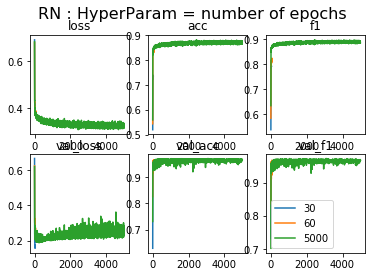

In [6]:
ho = np.array(history_obj)
ho = ho.transpose(1,2,0)

leg = [str(i) for i in epochs_range]                                                                                                                                                
                                                                                                                                       
titre = "RN : HyperParam = number of epochs"                                                                                                                                          

plot_perf(ho, leg, titre ,sub_title)

EXPLICATION A REVOIR CAR JE NE VOIS PAS DE SURAPPRENTISSAGE : 
Nous remarquons que les performances (accuracy et f1_score) tendent vers les mêmes taux qu'il y ait 30, 60 ou 120 itérations. 

(graphe time - itérations)

In [ ]:
plot_delay(training_delay_RN,predicting_delay_RN,titre)

Notons ici que le temps d'apprentissage et de prédiction croissent avec le nombre d'itération.

## Question 5
(1 - La démarche de comparaison des hyperparamètres est sérieuse. Les résultats sont présentés de façon correcte et concise dans un tableau et un graphique.
2 - Les explications montrant les différences sont claires, concises et plausibles.
3 - La configuration matérielle sur laquelle les expérimentations est présenteainsi que le temps d’exécution requis pour compléter les expérimentations)

1&2 : (alterner graphe et explication (cf q3) ou mettre tous les graphes (en q3) puis explication ici en q5.

3 : regarder les specs du PC.

## Question 6
(1 - La méthode est décrite et un lien avec l’implémentation est fait afin d’expliquer comment l’équipe a trouvé le meilleur modèle SVM. 
2- Les résultats sont présentés de façon correcte et concise dans un TABLEAU ET un GRAPHIQUE. 
3 - La configuration matérielle sur laquelle les expérimentations est présente ainsi que le temps d’exécution requis pour compléter les expérimentations.)

1 - explication implémentation SVM

## Question 7
(L’impact de la taille de l’ensemble d’apprentissage sur les performances est présent et décrit convenablement.)

Dans le cas du MLP, on remarque que pour 1600 images, le temps d'apprentissage se situe autour de 5 secondes. Pour 16000, le temps d'apprentissage est d'environ 32 secondes. 

## Question 8
(Un classificateur est recommandé en se basant sur l’expérimentation précédemment effectuée.)

SVM ou MLP en fonction des résultats (perf + time).

## Question 9
(Des pistes d’amélioration sont proposées.)

Bonne question : investiguer davantages les études d'hyperparamètres pour trouver une solution optimale ?

## Conlusion

(1 - Un court résumé du problème est présent.
2 - Un rappel des résultats est présent.
3 - Des pistes pour de possibles améliorations sont présentes.)

Ce troisième laboratoire nous a permis de comprendre davantage le fonctionnment de deux nouvelles méthodes de classification : SVM et MLP. Dans les deux cas, les temps d'apprentissage sont bien plus long que les premiers laboratoires. 
Avantages et incovénients entre les deux méthodes:
MLP : nb de sorties non limitée != svm => MLP plus évolutif si plus de deux catégories. 

Les résultats sont meilleurs dans le cas de ..... (MLP,SVM ?).

